In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import random
from sklearn.model_selection import train_test_split
from torchvision import *
from torch.utils.data import *
from PIL import Image
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.transforms as T

In [ ]:
import os

source_dir = '/content/drive/MyDrive/Dataset'

class_folders = os.listdir(source_dir)

class_to_idx = {class_name: idx for idx, class_name in enumerate(class_folders)}



for class_name in class_folders:
    class_folder_path = os.path.join(source_dir, class_name)
    if os.path.isdir(class_folder_path):  # Vérifier si c'est bien un dossier
        image_files = os.listdir(class_folder_path)
       # print(f"Images in class {class_name} (Index {class_to_idx[class_name]}) ({len(image_files)} images):", image_files[:5])  # Afficher les 5 premières images


In [ ]:
class_dirs = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]

all_images = []
for class_dir in class_dirs:
    class_path = os.path.join(source_dir, class_dir)
    images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith('.jpg')]
    labels = [class_dirs.index(class_dir)] * len(images)
    all_images.extend(list(zip(images, labels)))

train_images, temp_images = train_test_split(all_images, test_size=0.2, random_state=42)
val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


class CustomDataset(Dataset):
    def __init__(self, image_list, transform=None):
        self.image_list = image_list
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        image_path, label = self.image_list[idx]
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

train_dataset = CustomDataset(train_images, transform)
val_dataset = CustomDataset(val_images, transform)
test_dataset = CustomDataset(test_images, transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Données prêtes pour l'entraînement, validation et test.")


Données prêtes pour l'entraînement, validation et test.


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class DeeperCNN(nn.Module):
    def __init__(self, num_classes):
        super(DeeperCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(512)

        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))

        self.fc1 = nn.Linear(512,512 )
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))

        x = self.global_pool(x)
        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x


In [ ]:

model = DeeperCNN(num_classes=len(class_dirs))
criterion = nn.CrossEntropyLoss()


optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch 1/10: 100%|██████████| 167/167 [52:42<00:00, 18.94s/batch, accuracy=0.845, loss=5.08]


Epoch 1/10, Train Loss: 5.0765, Accuracy: 0.84%
Epoch 1/10, Validation Loss: 5.0121, Accuracy: 0.30%


Epoch 2/10: 100%|██████████| 167/167 [22:13<00:00,  7.99s/batch, accuracy=0.976, loss=5.01]


Epoch 2/10, Train Loss: 5.0069, Accuracy: 0.98%
Epoch 2/10, Validation Loss: 5.0133, Accuracy: 0.30%


Epoch 3/10: 100%|██████████| 167/167 [22:20<00:00,  8.03s/batch, accuracy=0.864, loss=5]


Epoch 3/10, Train Loss: 5.0033, Accuracy: 0.86%
Epoch 3/10, Validation Loss: 5.0156, Accuracy: 0.30%


Epoch 4/10: 100%|██████████| 167/167 [23:01<00:00,  8.28s/batch, accuracy=0.92, loss=5]


Epoch 4/10, Train Loss: 5.0005, Accuracy: 0.92%
Epoch 4/10, Validation Loss: 5.0194, Accuracy: 0.60%


Epoch 5/10: 100%|██████████| 167/167 [25:47<00:00,  9.27s/batch, accuracy=0.807, loss=5]


Epoch 5/10, Train Loss: 4.9994, Accuracy: 0.81%
Epoch 5/10, Validation Loss: 5.0212, Accuracy: 0.30%


Epoch 6/10: 100%|██████████| 167/167 [24:41<00:00,  8.87s/batch, accuracy=0.807, loss=5]


Epoch 6/10, Train Loss: 4.9987, Accuracy: 0.81%
Epoch 6/10, Validation Loss: 5.0208, Accuracy: 0.30%


Epoch 7/10: 100%|██████████| 167/167 [25:08<00:00,  9.03s/batch, accuracy=0.845, loss=5]


Epoch 7/10, Train Loss: 4.9979, Accuracy: 0.84%
Epoch 7/10, Validation Loss: 5.0225, Accuracy: 0.30%


Epoch 8/10: 100%|██████████| 167/167 [24:38<00:00,  8.85s/batch, accuracy=0.788, loss=5]


Epoch 8/10, Train Loss: 4.9976, Accuracy: 0.79%
Epoch 8/10, Validation Loss: 5.0222, Accuracy: 0.30%


Epoch 9/10: 100%|██████████| 167/167 [24:30<00:00,  8.80s/batch, accuracy=0.882, loss=5]


Epoch 9/10, Train Loss: 4.9975, Accuracy: 0.88%
Epoch 9/10, Validation Loss: 5.0223, Accuracy: 0.30%


Epoch 10/10: 100%|██████████| 167/167 [24:34<00:00,  8.83s/batch, accuracy=0.995, loss=5]


Epoch 10/10, Train Loss: 4.9973, Accuracy: 0.99%
Epoch 10/10, Validation Loss: 5.0237, Accuracy: 0.60%


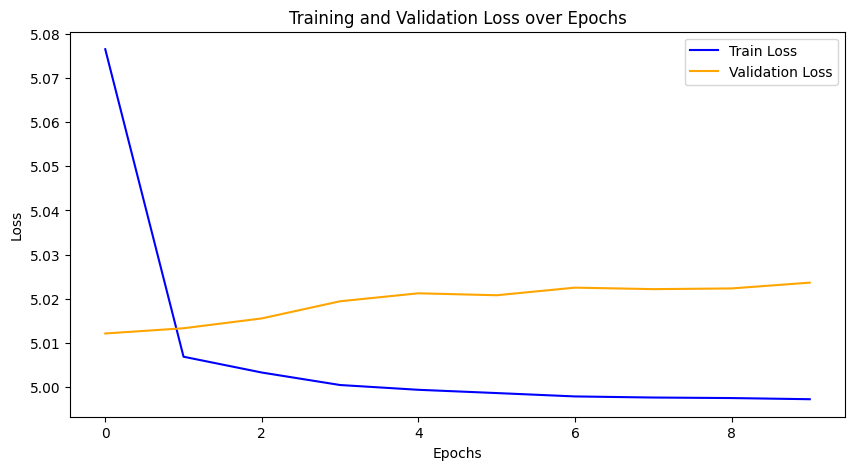

In [ ]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

train_losses = []
val_losses = []

epochs = 10
for epoch in range(epochs):

    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", unit="batch") as pbar:
        for images, labels in pbar:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(images)

            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            pbar.set_postfix(loss=running_loss/len(train_loader), accuracy=100 * correct/total)

    train_losses.append(running_loss / len(train_loader))

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct/total:.2f}%")

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)

            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {100 * correct/total:.2f}%")

plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_losses, label='Train Loss', color='blue')
plt.plot(range(epochs), val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()
